# An Introduction to Jupyter Notebook, PyDICOM and Numpy

#### By Veda Murthy

This notebook should server as an introduction to Jupyter Notebook and the python toolboxes PyDICOM and Numpy. 

Jupyter notebook (the software used to develop this) is effectively python commands organized into blocks. Each of these blocks can be run, and, in the event we plot a graph or print some results, we can see the results directly in the notebook, and render the results on github. This allows us to see the results even without running the code.

PyDICOM is a python module (set of functions) used to read DICOM data into python. It is very similar to MATLAB's `dicomread` and `dicominfo`.

Numpy allows us to create MATLAB-like arrays in Python. It is useful for almost every single function we will develop.

## Importing Modules and Running Blocks

Unlike MATLAB, functions that you do not develop are not loaded by default. We must import them before we use them. We run these commands:

```
import numpy as np #Numpy
import cv2 #OpenCV
import dicom # PyDICOM
import matplotlib.pyplot as plt #MatPlotLib - used to show graphs and figures

```

In order to load our modules into our python environment. Then we can call functions, for example
```
x = np.array([1, 2, 3])
dose_data = dicom.read_file('dose.dcm')
```

from the modules we loaded.

In order to run a block of code in Jupyter Notebook, we can press `SHIFT + ENTER`, or we can go to `Cell -> Run Cell` in the menu of Jupyter Notebook.

Jupyter Notebook cells that are running will have a star next to them. For example, it may look like
```
In [*] (Code in block here)
```

To add another block of code, press the + sign under `file` in the Jupyter Notebook menu bar. To delete a block of code, press the scissors icon next to the plus sign in the Jupyter Notebook menu bar.

To save your Jupyter Notebook, press `CTRL + S` or the hard disk icon next to the plus in the menu bar.

To exit out of Jupyter Notebook, close all tabs in Firefox and press `CTRL + C` in the terminal. Press `y` quickly when prompted to.


In [31]:
import numpy as np
import cv2
import dicom
import matplotlib.pyplot as plt

# Using PyDICOM to read Dicom data from UCLA_PR folders

Now, we use PyDICOM to load in data from our DICOM files. PyDICOM effectively has two main uses

1) `structureset = dicom.read_file('DICOM_FILE.dcm')` - this allows us to read header data from each dicom file. For example, this may be where to get PatientID, or Image orientation data stored with the DICOM file.
2) `np.array(structureset.pixel_array)` - this turns our image data into a numpy array, allowing us to manipulate it easily

First, we load in `structureset` for our sample patient, UCLA_PR_5

In [32]:
base = '/home/radiation/RadiationTherapyDecisionSupport/data/'
file_folder = 'UCLA_PR_5/'

structureset = dicom.read_file(base + file_folder + 'structureset.dcm')


``structureset`` is a dictionary type object with different fields for each item. It's almost equivalent to ``dicominfo`` in MATLAB. 

To access field data, we can write `structureset.FIELD_NAME`, for example, ``structureset.PatientID`` will get us the PatientID field from the dicom field.

Below we print a field of ``structureset`` along with its value:

In [33]:
print(structureset.PatientID)

UCLA_PR_5


The next question might be- what if we do not know what is the field name we want to access? Then we can use the command `structureset.dir()` . When printed, it will list all fields of a DICOM file.

In [34]:
print(structureset.dir())

['AccessionNumber', 'ApprovalStatus', 'DeviceSerialNumber', 'EthnicGroup', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'OtherPatientIDs', 'PatientBirthDate', 'PatientBirthTime', 'PatientID', 'PatientName', 'PatientSex', 'PhysiciansOfRecord', 'ROIContourSequence', 'RTROIObservationsSequence', 'RefdFrameOfReferenceSequence', 'ReferencedFrameOfReferenceSequence', 'ReferringPhysicianName', 'ReviewDate', 'ReviewTime', 'ReviewerName', 'SOPClassUID', 'SOPInstanceUID', 'SeriesDescription', 'SeriesInstanceUID', 'SeriesNumber', 'SoftwareVersions', 'SpecificCharacterSet', 'StationName', 'StructureSetDate', 'StructureSetLabel', 'StructureSetROISequence', 'StructureSetTime', 'StudyDate', 'StudyDescription', 'StudyID', 'StudyInstanceUID', 'StudyTime']


If we *kind of* know the name of the field we want to access, we can use that as an input to `structureset.dir()`. For example, we may want something from a field that starts with `'SOP'`, but we may not know which specific field we want. We can write `structureset.dir('SOP')` and see all the fields that start with `'SOP'`.

In [35]:
print(structureset.dir('SOP'))

['SOPClassUID', 'SOPInstanceUID']


We can also access the value stored with a given field name using `structureset.data_element(FIELD_NAME).value` For example

```
structureset.data_element('AccessionNumber').value
```
will get the accession number from the `AccessionNumber` field of the DICOM file.

In [36]:
structureset.data_element('AccessionNumber').value

'6835933'

## Using PyDICOM and Numpy to read and process CT Image data

Among our two types of DICOM files are the `structureset.dcm` files, and the CT scan files. There are several CT scans for any patient. for UCLA_PR, each CT scan is stored as a separate file in the Patient's folder.

First, we get the header data for our CT scan using `dicom.read_file()`. Note that we import the OS module so that we can get a list of the filenames of all CT scans in the directory, then use the index `[0]` to get the first CT scan filename from our list.

In [37]:
import os
ct_scan = dicom.read_file(base + file_folder + os.listdir(base + file_folder)[0])

Here, again we print the field names for the CT scan files. Note how these are different from the field names of the `structureset` file.

In [38]:
print(ct_scan.dir())

['AccessionNumber', 'AcquisitionNumber', 'BitsAllocated', 'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate', 'ContentTime', 'ConvolutionKernel', 'DataCollectionDiameter', 'DeviceSerialNumber', 'DistanceSourceToDetector', 'DistanceSourceToPatient', 'EthnicGroup', 'Exposure', 'ExposureTime', 'FilterType', 'FocalSpots', 'FrameOfReferenceUID', 'GantryDetectorTilt', 'GeneratorPower', 'HighBit', 'ImageOrientationPatient', 'ImagePositionPatient', 'ImageType', 'InstanceCreationDate', 'InstanceCreationTime', 'InstanceNumber', 'InstitutionName', 'KVP', 'Manufacturer', 'ManufacturerModelName', 'Modality', 'OtherPatientIDs', 'PatientBirthDate', 'PatientBirthTime', 'PatientID', 'PatientName', 'PatientPosition', 'PatientSex', 'PhotometricInterpretation', 'PhysiciansOfRecord', 'PixelData', 'PixelRepresentation', 'PixelSpacing', 'PositionReferenceIndicator', 'ReconstructionDiameter', 'ReferringPhysicianName', 'RescaleIntercept', 'RescaleSlope', 'RotationDirection', 'Rows', 'SOPClassUID', 'SOP

You can see how one of the field names is marked as `PixelData`. This is because the CT scan also contains an image, unlike the `structureset.dcm` file. We can access that image data using `ct_scan.pixel_array`

However, just running `ct_scan.pixel_array` won't get us what we want, which is numerical data in an array for our image. To accomplish this, we wrap the pixel data in a numpy array, by running
```
np.array(ct_scan.pixel_array)
```


In the code block below, we also print the shape of the array containing the image data and the data type of the array. This is our first introduction to numpy- each array's shape and datatype are very important.

Shape (2D, 3D, exact dimensions) forms a really great mechanism for debugging our code. If we print the dimensions of the image, and they do not match what they should be, we know something is wrong with our code (or possibly the dicom file)

Datatype (float64, int, uint8) is also very important because it's a component numpy inherits from its C-language source code. As a simple introduction:
* float64 is a double-precision number, capable of storing very accurate decimals. It's equivalent to `double` in MATLAB. 
* uint8 is typically used for storing and showing image data. It can store integers from 0 to 255. While we may display a lot of arrays that are in uint8, our functions do not typically use uint8 arrays unless we can guarantee we won't have decimals in our output.
* uint16 is used mostly by PyDICOM for loading image data. By default, your images will be loaded in uint16.
* int is signed integers.

The most basic things to know about datatypes in numpy is that while we can set integer data as float64, we cannot set float64 data as int without losing precision. Decimals will be rounded down with such a conversion.

Some functions, particularly those of OpenCV, may also require a certain type of image data (typically `uint8`). Thus, if you can cast your data to uint8, it may be good to do so.


In [39]:
ct_image = np.array(ct_scan.pixel_array)
print(ct_image.shape)
print(ct_image.dtype)

(512, 512)
uint16


There are some helpful functions to know in Numpy:
* `np.unique(ct_image)` : gets all the unique values in an array. Can be useful for seeing if casting our array to a different datatype changed the values drastically.
* `np.max(image)` : gets the maximum value in an array. Also note its similar function, `np.min(array)`.
* `array.astype(np.float64)` : casts our array to a different datatype. Assuming ``array``, was, for example, an array of integers, this would cast it to an array of floating point values.
* `np.zeros((512, 512))` : Makes an array of all-zero values. Note the set of two parenthesis; the inner parenthesis `(512, 512)` tells the shape of the all-zero array to make- in this case, 512 x 512
* `array[array == 0] = 1` : this is the simplest way of getting a subset of values in an array that meet a condition in numpy. Let's say we wanted to get all values of `array` that were equal to zero, and set all those zero values equal to one. We could run this command, thereby changing only the subset of values we want to rather than them all.

We can try out many of these functions on our ct image data:

In [40]:
print(np.unique(ct_image)) # see what values are in our array beforehand

ct_image_float = ct_image.astype(np.float64) # casting

print(np.unique(ct_image_float)) # see what values are in our array after casting

print("Maximum value is: " + str(np.max(ct_image))) # max value


[  24   25   26 ..., 3111 3123 3133]
[   24.    25.    26. ...,  3111.  3123.  3133.]
Maximum value is: 3133


## Using Matplotlib to Display Images

Sometimes, we may want to confirm our functions work by printing graphs. We can do this using Matplotlib, a python module that lets us make graphs. For most of our work, we only need to know two commands:
* `plt.imshow(ct_image)` will set up our `ct_image` to be plotted
* `plt.show()` will print the graph to the screen

You must remember to use `plt.show()` after `plt.imshow` because otherwise you'll just see a memory address of the image, such as ` <matplotlib.image.AxesImage at 0x7f11ca2676d8> ` being printed to the screen.

Below, we print the `ct_image` to our screen. If you are seeing this on GitHub, you'll notice the figure renders on GitHub as well. 

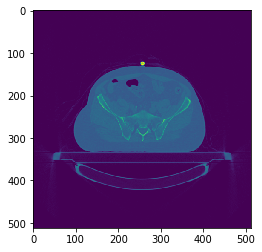

In [41]:
plt.imshow(ct_image)
plt.show()

## Dose Data with PyDICOM

Dose data is treated very similarly to `structureset` and CT image data. We can read it using `dicom.read_file()` and print directories as well. 

In [42]:
dose_data = dicom.read_file(base + file_folder + "dose.dcm")
dose_data.dir()

['AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'Columns',
 'DVHSequence',
 'DeviceSerialNumber',
 'DoseGridScaling',
 'DoseSummationType',
 'DoseType',
 'DoseUnits',
 'EthnicGroup',
 'FrameIncrementPointer',
 'FrameOfReferenceUID',
 'GridFrameOffsetVector',
 'HighBit',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'InstanceCreationDate',
 'InstanceCreationTime',
 'InstanceNumber',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'NumberOfFrames',
 'OtherPatientIDs',
 'PatientBirthDate',
 'PatientBirthTime',
 'PatientID',
 'PatientName',
 'PatientSex',
 'PhotometricInterpretation',
 'PhysiciansOfRecord',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'PositionReferenceIndicator',
 'RefdRTPlanSequence',
 'RefdStructureSetSequence',
 'ReferencedRTPlanSequence',
 'ReferencedStructureSetSequence',
 'ReferringPhysicianName',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SliceThick

There's a few things to notice about Dose Data

1) It's in the format [number_of_cts, height, width] in terms of shape

In [43]:
dose_images = np.array(dose_data.pixel_array)
dose_images.shape

(317, 136, 206)

2) It has very large values compared to CT scans (hence the use of uint32)

In [44]:
print(dose_images.dtype)
print(np.max(dose_images))


uint32
1051318


## Why are there no Examples with OpenCV?

OpenCV functions will not make up the majority of your code. In fact, there will be a lot of developed functions that do not even use OpenCV at all. 

This is because OpenCV contains very specialized image processing functions. It also may not contain image processing functions that you need. If you do need a function that is not included with OpenCV:
1) Try using `skimage` - you can load it through `import skimage`
2) Try using `scipy` - you can load it through `import scipy`

In addition, OpenCV can be very difficult to handle in Python. This is because most of the source code for OpenCV is in C++, which is a lot more strict about arrays and datatypes that Python is. This means that many OpenCV errors can be very incomprehensible to debug.

To see an example code which does call an OpenCV function, you can see `getIsodose` in the `General` folder.


## Frequently Seen Errors

1) 
```
TypeError: 'numpy.ndarray' object is not callable
```

This error results from using parenthesis (MATLAB syntax) instead of square brackets to index an array. For example, we write `dose_images[0]` , not `dose_images(0)` to get the 0th element of an array.

2) All the values are slightly off compared to MATLAB

This is probably because Python starts array indexing with 0, not 1 as in MATLAB. to get the first element of an array in python, we write `array[0]`, not `array[1]`.

At a more complicated level, this may be because of implementation differences between Numpy and MATLAB. There's not really much we can do on that front, though.

3) Running the same code block multiple times gives different results.

This is because Jupyter Notebooks are treated as series of Python commands. That means that results persist between runs of the same block of code. Take this script for example:

```
In [1]: x = 1

In [2]: x += 1
        print(x)
```

If I kept running the second block of code (`In [2]`) repeatedly, I would see the following:
```
2
```

then 
```
3
```

on my second run, then

```
4
```
on my third run, and so on.

4) 
```
NameError: name 'VAR_NAME' is not defined
```

This may be because a function requires a string, but you have provided it with a variable name. Take for example:
```
dicom.read_file(dose.dcm)
```

This function will not work because `dose.dcm` should be a string. The function should instead be called as `dicom.read_file('dose.dcm')`

5) Jupyter Notebook keeps crashing, very slow

This could be because the VM is slow, you have too many applications open on your host computer, or because some function in your code is slow or failing. Cause is somewhat hard to determine.

## How I Format Text in a Jupyter Notebook

You'll notice that not everything is a code block in this notebook- a lot of it is formatted text.

This is because Jupyter Notebook effectively has two settings for code blocks- Code, which is the default, and Markdown, which is basically a text editor with added functionality. 

To change between the two types of blocks, there should be a drop-down menu under `help` in the Jupyter Notebook menu bar that lets you change blocks between Code and Markdown. 
